# Introduction

In this notebook, we focus on **unsupervised learning** techniques for **clustering**, a method used to group similar data points together based on their features. Unlike supervised learning, where the model is trained on labeled data, unsupervised learning algorithms like clustering can be used to discover hidden patterns or structures in the data without predefined categories. Clustering is widely applied in various fields, including market segmentation, anomaly detection, and image processing.

In this notebook, we will explore and apply three popular clustering algorithms:

- **Hierarchical Clustering**: This method builds a tree-like structure (dendrogram) to represent the data and can be used to visualize and identify natural groupings. We will discuss both agglomerative (bottom-up) and divisive (top-down) hierarchical approaches.
  
- **K-Means Clustering**: A partition-based algorithm that divides data into `K` clusters by iteratively assigning data points to the nearest centroid and updating the centroids based on these assignments.
  
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: A density-based clustering method that groups together data points that are closely packed and can identify outliers as noise. Unlike K-Means, DBSCAN does not require the number of clusters to be predefined.

Each of these algorithms has unique strengths and is suited to different types of datasets. By the end of this notebook, you will have a deeper understanding of how these clustering techniques work and when to apply them to real-world problems.


## Clustering Wine Data Based on Chemical Properties

In this notebook, we will work with the **Wine Quality** dataset, which contains various chemical properties of wines, including attributes like acidity, sugar, pH, and alcohol content. The dataset also includes two additional columns: a **quality score** (ranging from 3 to 9, with 9 being the highest) and a **color** label (red or white). The dataset file is named `Wine_Quality_Data`.

For our clustering tasks, we will focus on the **chemical properties** of the wines (excluding quality and color) to apply unsupervised learning techniques. By clustering wines based on their chemical composition, we aim to uncover natural groupings or patterns in the data. While this is an unsupervised learning task, it will be interesting to see how the resulting clusters relate to the known attributes of **color** and **quality**.

The goal of this exercise is to explore how different clustering algorithms perform and whether they reveal meaningful structures within the data that align with the wine’s characteristics or quality ratings.


In [1]:
from __future__ import print_function
import os

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit


## Question 1: Data Exploration and Visualization

In this question, we will begin by importing the **Wine Quality** dataset and exploring its features. The goal is to understand the nature of the data and its different attributes.

### Tasks:

1. **Import the Data**: Load the dataset into a DataFrame and examine the features.
2. **Feature Classification**: Identify which features are continuous, categorical, and boolean.
3. **Examine Wine Colors and Quality Range**: Determine how many entries correspond to each wine color (red vs. white) and explore the range of quality scores.
4. **Histogram Plot**: Create a histogram to visualize the distribution of quality for each wine color.


In [29]:
import pandas as pd

# Import the data Wine_Quality_Data

data = pd.read_csv('/content/Wine_Quality_Data - Wine_Quality_Data.csv')


In [30]:
#display the head
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
#try this code !!
data.head(4).T

,0,1,2,3
fixed_acidity,7.4,7.8,7.8,11.2
volatile_acidity,0.7,0.88,0.76,0.28
citric_acid,0.0,0.0,0.04,0.56
residual_sugar,1.9,2.6,2.3,1.9
chlorides,0.076,0.098,0.092,0.075
free_sulfur_dioxide,11.0,25.0,15.0,17.0
total_sulfur_dioxide,34.0,67.0,54.0,60.0
density,0.9978,0.9968,0.997,0.998
pH,3.51,3.2,3.26,3.16
sulphates,0.56,0.68,0.65,0.58


In [32]:
#shape of data
df.shape # Access the 'shape' attribute directly, not as a method

(6497, 13)

### Notes:
- **Data Types**: K-Means clustering in Scikit-learn is designed to work with **continuous data**, as it relies on distance calculations (such as Euclidean distance). While K-Means can sometimes be used with categorical or boolean data, it performs best when all features are continuous.
- In this dataset, we will focus on the continuous features (i.e., all the chemical properties like acidity, sugar, pH, and alcohol) since these are the ones we’ll be using for clustering. We will exclude the **quality** and **color** columns from the clustering process since they are categorical or ordinal in nature.


In [33]:
#data type of the columns
df.dtypes

,0
fixed_acidity,float64
volatile_acidity,float64
citric_acid,float64
residual_sugar,float64
chlorides,float64
free_sulfur_dioxide,float64
total_sulfur_dioxide,float64
density,float64
pH,float64
sulphates,float64


- The number of entries for each wine color.

In [34]:
# Count the number of rows for each unique color
color_counts = df['color'].value_counts() # Change 'Color' to 'color'

# Display the counts
# use the built in function instead of the variable to print the results
__builtins__.print("Counts for each color:\n", color_counts)

Counts for each color:
 color
white    4898
red      1599
Name: count, dtype: int64


- Compute how many wine we have for each quality (calculate the distribution of quality values).

In [37]:
# Assuming the DataFrame has a column 'Quality' representing wine quality
quality_counts = df['quality'].value_counts()

# Display the distribution of quality values
__builtins__.print("Distribution of wine quality values:\n", quality_counts)



Distribution of wine quality values:
 quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


- Now, let's plot a histogram to visualize the **distribution of wine quality**. This histogram will show the frequency of each quality score (from 3 to 9). We will use the `matplotlib` library to create the plot.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline # check why do we use this

UsageError: unrecognized arguments: # check why do we use this


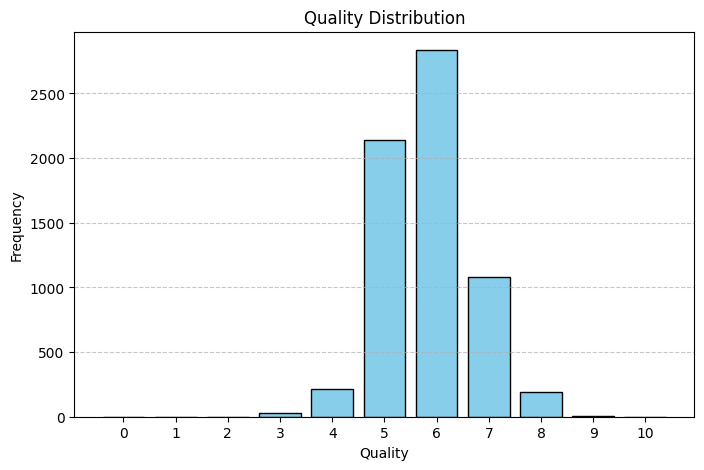

In [40]:
#Your code
import pandas as pd
import matplotlib.pyplot as plt

# Plot histogram using matplotlib
plt.figure(figsize=(8, 5))
# Access the 'quality' column instead of 'Quality'
plt.hist(data['quality'], bins=range(0, 12), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(range(0, 11))  # Set x-ticks from 0 to 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Question 2: K-Means Clustering with Two Clusters

In this question, we will apply the **K-Means clustering** algorithm to group the wine samples into two clusters based on their **chemical properties** (i.e., all features except for **quality** and **color**). By fitting a K-Means model with two clusters, we will explore how the data is grouped and examine the characteristics of each cluster, particularly by wine color.

### Tasks:

1. **Fit the K-Means Model**: Use the K-Means algorithm to fit a model with **two clusters**.
2. **Examine the Clusters**: Investigate the wine color distribution in each of the two clusters to see how the clustering corresponds to the wine colors (red vs. white).
3. **Visualize the Clusters**: Create a 2D visualization of the clusters to better understand how the data points are grouped.


In [41]:
# Instantiate KMeans clustering algorithm
km = KMeans(n_clusters=3, random_state=42)


In [42]:
#fit the data
float_columns = data.select_dtypes(include=['float64', 'int64'])  # Selects numerical columns
km = km.fit(float_columns)

In [44]:
# Adding cluster labels to the original dataset
data['cluster'] = km.predict(float_columns)

In [48]:
# Examine clusters by wine color
cluster_counts = data.groupby(['cluster', 'color']).size().unstack()  # Changed 'Color' to 'color'
# Use the built-in print function by using __builtins__.print
__builtins__.print(cluster_counts)

color     red  white
cluster             
0         261   2654
1          11   1967
2        1327    277


## Question 3: K-Means Clustering with Varying Cluster Numbers

In this question, we will experiment with **K-Means clustering** by fitting models with a range of cluster numbers, from **1 to 20**. For each model, we will store the number of clusters and the **inertia value** (a measure of how well the data fits the clusters).

We will then plot the number of clusters versus the inertia to determine if there is an **ideal cluster number**—a value where increasing the number of clusters no longer significantly reduces inertia.

### Tasks:

1. **Fit K-Means Models**: Fit K-Means models with cluster numbers ranging from **1 to 20**.
2. **Store Inertia Values**: For each model, record the **inertia** (a measure of within-cluster variance).
3. **Plot Inertia vs. Cluster Number**: Create a plot that shows how the inertia changes as the number of clusters increases. This will help us visualize where the optimal number of clusters might lie.

### Notes:
- **Inertia**: Inertia is the sum of squared distances from each point to its assigned cluster center. Lower inertia values generally indicate better-fitting models. However, after a certain point, adding more clusters will not improve the model significantly, which can be visualized in an **elbow plot**.
- We will use this technique to observe if there is a noticeable "elbow" in the inertia plot, which is often used to determine the ideal number of clusters.

Let's fit the models and plot the results.


In [57]:
# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)  # Initialize KMeans with clust clusters
    # Fit the model to only the numerical features
    km = km.fit(data.select_dtypes(include=['number'])) # Only include numerical features for clustering

    km_list.append(pd.Series({'clusters': clust,
                              'inertia': km.inertia_,
                              'model': km}))

### The Elbow Method

The **elbow method** is a technique used to determine the optimal number of clusters in K-Means clustering. The idea is to fit the model for different numbers of clusters (from 1 to a predefined maximum) and plot the **inertia** (the sum of squared distances from points to their assigned cluster centers) for each model.

- **Inertia**: A lower inertia indicates that the clusters are well-defined, with points being closer to their respective centroids.
- As the number of clusters increases, inertia will always decrease, because more clusters allow the model to fit the data better. However, after a certain point, the reduction in inertia becomes marginal, and this is where the **elbow** appears in the plot.
  
The **elbow point** is the number of clusters where inertia starts to decrease at a slower rate. This point represents the optimal number of clusters because adding more clusters beyond this point does not significantly improve the model's fit.

In the plot below, we will visualize how inertia changes as we increase the number of clusters. The **elbow** will help us identify the ideal number of clusters for our K-Means model.


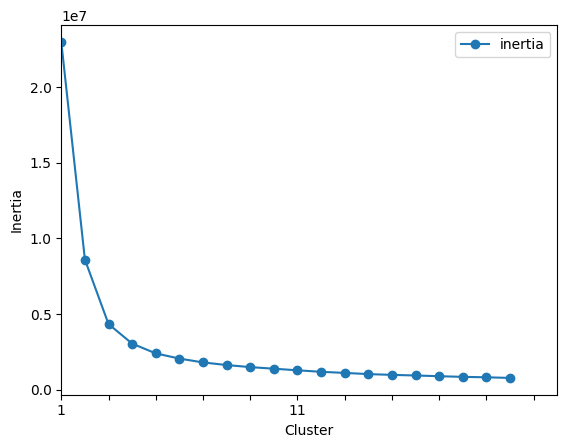

In [58]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

## Question 4: Agglomerative (Hierarchical) Clustering

In this question, we will apply **Agglomerative Clustering**, also known as **Hierarchical Clustering**, to cluster the wine data into **two clusters** based on the chemical properties. After fitting the model, we will compare the clustering results with those obtained using **K-Means** clustering, particularly focusing on how the wine color relates to the clusters. Additionally, we will visualize the clustering hierarchy using a **dendrogram**.

### Tasks:

1. **Fit the Agglomerative Clustering Model**: Use Agglomerative Clustering to create a model with **two clusters**.
2. **Compare with K-Means Results**: Compare the clusters produced by Agglomerative Clustering to those produced by K-Means with respect to wine color (red vs. white).
3. **Visualize the Dendrogram**: Create a dendrogram to visualize the hierarchical structure of the clusters. This will help understand how the samples are merged into clusters at each step of the process.

### Notes:
- **Agglomerative Clustering** is a bottom-up approach where each data point starts as its own cluster, and pairs of clusters are merged iteratively based on a distance metric. In contrast to K-Means, which uses centroids to form clusters, agglomerative clustering builds a tree structure (dendrogram) that reveals the hierarchy of the clusters.
- The **dendrogram** is a useful tool to visualize how data points are merged at each step, and it can also provide insight into choosing the number of clusters.

Let’s proceed by fitting the Agglomerative Clustering model, comparing the results, and visualizing the dendrogram.


In [63]:
# Assuming the elbow method suggests 3 clusters (modify based on the elbow point)
best_nb_clusters = 3

# Instantiate Hierarchical clustering algorithm using n_clusters = best_nb_clusters
# Remove random_state parameter as it's not supported in AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=best_nb_clusters)


In [70]:
from sklearn.decomposition import PCA

# Fit the model to the data
ag_labels = ag.fit_predict(data[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                 'density', 'pH', 'sulphates', 'alcohol']])

# Define features before scaling
features = data[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                 'density', 'pH', 'sulphates', 'alcohol']]

# Scale the data before applying PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)  # Initialize PCA with 2 components
X = pca.fit_transform(scaled_features)  # Apply PCA and store the result in 'X'

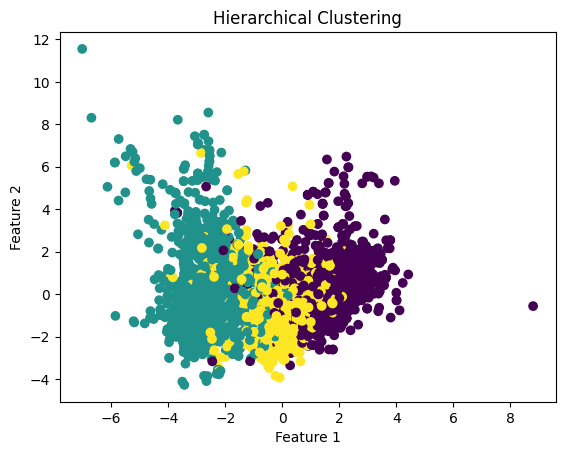

In [72]:
# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=ag_labels, cmap='viridis') # agg_labels is now available
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Though the cluster numbers are not necessarily identical, the clusters are very consistent within a single wine variety (red or white).

And here is a plot of the dendrogram created from agglomerative clustering.

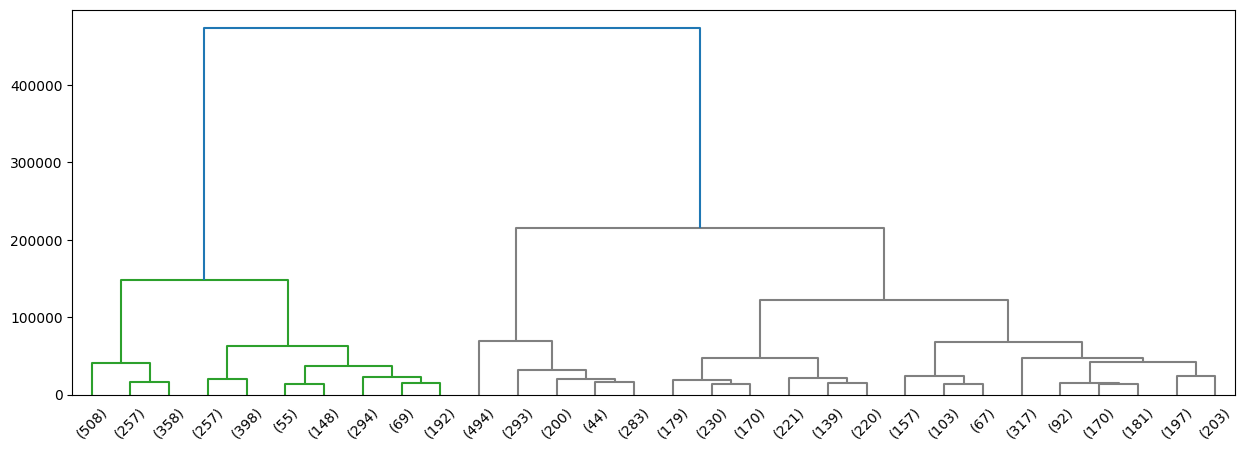

In [73]:
from scipy.cluster import hierarchy
from matplotlib import colors

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)